In [ ]:
from google.colab import drive
drive.mount('/content/drive')

PATH = "/content/drive/MyDrive/atomic2"
%load_ext tensorboard

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !cp -r /content/drive/MyDrive/atomic2 .
# !unzip ./atomic2/dataset.zip -d atomic2/data

# !rm -rf splitted
# !mkdir splitted
# !mkdir splitted/labels
# !mkdir splitted/images
# !mkdir splitted/orig_coord

# !rm -rf val_splitted
# !mkdir val_splitted
# !mkdir val_splitted/labels
# !mkdir val_splitted/images
# !mkdir val_splitted/orig_coord

# !rm -rf train
# !rm -rf val
# !mkdir train
# !mkdir train/images
# !mkdir train/labels
# !mkdir val
# !mkdir val/images
# !mkdir val/labels

In [ ]:
!nvidia-smi

Sun Jun 16 03:26:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              47W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
import os, glob, shutil
DATA_PATH = "atomic2/data/"
for f in os.listdir(DATA_PATH):
    try:
        if int(f.split()[0]) == 0:
            if f.endswith("txt"):
                shutil.copyfile(DATA_PATH + f, "val/" + "labels/" + f)
            else:
                shutil.copyfile(DATA_PATH + f, "val/" + "images/" + f)
        else:
            if f.endswith("txt"):
                shutil.copyfile(DATA_PATH + f, "train/" + "labels/" + f)
            else:
                shutil.copyfile(DATA_PATH + f, "train/" + "images/" + f)
    except:
        pass

In [ ]:
# from atomic2.data_gen import main
# from pathlib import Path

# orig_path_labels = Path('/content/train/labels')
# orig_path_images = Path('/content/train/images')
# save_path_labels = Path('/content/splitted/labels')
# save_path_images = Path('/content/splitted/images')
# save_path_orig_coord = Path('/content/splitted/orig_coord')

# main(orig_path_labels, orig_path_images, save_path_labels, save_path_images, save_path_orig_coord)

# orig_path_labels = Path('/content/val/labels')
# orig_path_images = Path('/content/val/images')
# save_path_labels = Path('/content/val_splitted/labels')
# save_path_images = Path('/content/val_splitted/images')
# save_path_orig_coord = Path('/content/val_splitted/orig_coord')

# main(orig_path_labels, orig_path_images, save_path_labels, save_path_images, save_path_orig_coord)

# import os, glob, shutil
# IMG_PATH   = "train/images/"
# LABEL_PATH = "train/labels/"
# for f in os.listdir(IMG_PATH):
#     t = f[:-4] + ".txt"
#     for i in range(3):
#         if f.endswith("txt"):
#             shutil.copyfile(LABEL_PATH + t, "splitted/labels/" + "a" + str(i)+ t)
#         else:
#             shutil.copyfile(IMG_PATH + f, "splitted/images/" + "a" + str(i) + f)

In [ ]:
import os
import glob
from PIL import Image

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

from IPython.display import Image as IImage

In [ ]:
PATH = "/content/splitted/"
PATH_O = "/content/train/"
COLOURS = ["r",   "b",   "g",   "orange", "pink"]
classes = ["adg", "int", "geo", "pro",    "non"]

In [ ]:
img_paths = glob.glob(PATH + 'images/*.jpg')
img_paths = [p.split("/")[-1] for p in img_paths]

In [ ]:
def open_sample(path, scale=8, PATH=PATH):
    img = Image.open(PATH + "images/" + path)
    h, w = img.size
    new_size = (h//scale, w//scale)
    img = np.array(img) # .resize(new_size)
    with open(PATH + "labels/" + path[:-4] + ".txt") as f:
        lines = []
        for line in f:
            txt = line.rstrip("\n")
            txt = [float(t) if i > 0 else int(t) for i, t in enumerate(txt.split())]
            print(txt)
            if len(txt) > 0:
                center_x = txt[2] * new_size[1]
                center_y = txt[1] * new_size[0]
                w = txt[4] * new_size[1]
                h = txt[3] * new_size[0]
                x = center_x - w / 2
                y = center_y - h / 2

                lines.append([txt[0], x, y, w, h])
    return img, lines, new_size

In [ ]:
def show_img(path, scale=8, PATH=PATH):
    img, boxes, img_size = open_sample(path, scale, PATH)
    fig, ax = plt.subplots()
    ax.imshow(img)
    for box in boxes:
        cl, x, y, w, h = box
        print(box)
        rect = patches.Rectangle((y, x), h, w, linewidth=1, edgecolor=COLOURS[cl], facecolor='none')
        ax.add_patch(rect)
    return ax

[2, 0.502443, 0.835488, 0.120342, 0.218566]
[0, 0.621869, 0.941833, 0.045205, 0.081081]
[0, 0.787721, 0.964747, 0.020159, 0.035253]
[0, 0.69548, 0.1698, 0.025046, 0.055229]
[0, 0.343616, 0.138073, 0.016494, 0.022327]
[0, 0.382101, 0.240893, 0.020159, 0.030552]
[0, 0.264508, 0.507051, 0.019548, 0.095182]
[0, 0.29047, 0.96886, 0.026268, 0.050529]
[2, 1568.6028000000001, 1698.32448, 472.10256000000004, 462.11328000000003]
[0, 1946.7918000000002, 2301.18336, 175.13496, 173.5872]
[0, 2045.7802800000002, 2986.14336, 76.14648, 77.41056]
[0, 307.12068000000005, 2622.55488, 119.29464, 96.17663999999999]
[0, 274.12452, 1287.8169599999999, 48.22632, 63.336960000000005]
[0, 487.33272000000005, 1428.56256, 65.99231999999999, 77.41056]
[0, 992.4336000000001, 978.1785600000001, 205.59312, 75.06432]
[0, 2038.16628, 1064.97024, 109.14264, 100.86912]


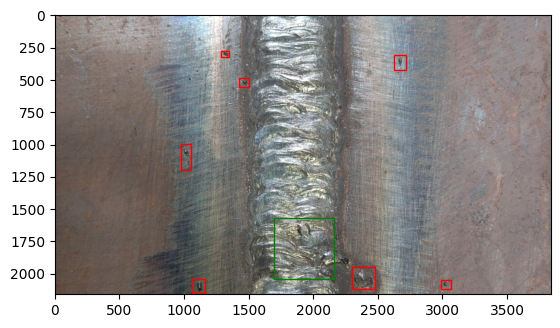

In [ ]:
a = show_img("4 (91).jpg", 1, PATH=PATH_O)

[2, 0.7862613333333334, 0.6709760000000001, 0.4274773333333333, 0.437132]
[0, 0.03974044444444452, 0.9377199999999999, 0.07948088888888905, 0.10105800000000002]
[2, 488.6028000000001, 618.32448, 472.10256000000004, 461.67552]
[0, 958.1662799999999, 0.0, 109.14264000000003, 85.83936000000017]


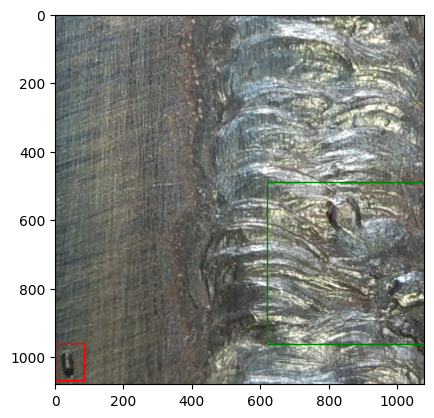

In [ ]:
a = show_img("4_4 (91).jpg", 1)

[2, 0.0002026666666665733, 0.6709760000000001, 0.0004053333333331466, 0.437132]
[0, 0.21108977777777774, 0.8836660000000002, 0.16072888888888884, 0.16216200000000008]
[0, 0.8007857777777777, 0.9294940000000003, 0.07167644444444426, 0.0705060000000001]
[2, 488.6028000000001, 0.0, 472.10256000000004, 0.4377599999997983]
[0, 866.7918000000002, 141.18336, 175.1349600000001, 173.58719999999994]
[0, 965.7802800000002, 826.14336, 76.14648000000011, 77.4105599999998]


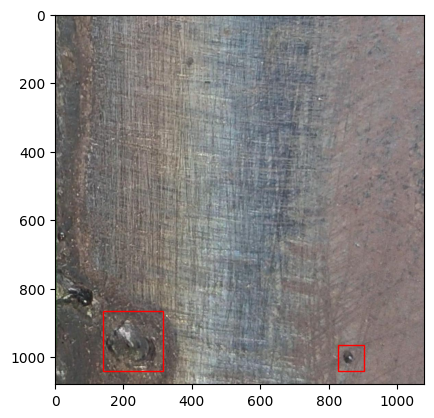

In [ ]:
a = show_img("5_4 (91).jpg", 1)

[0, 0.2217457777777777, 0.276146, 0.05864533333333342, 0.044653999999999985]
[0, 0.3585813333333334, 0.48178600000000005, 0.07167644444444447, 0.061104000000000006]
[0, 274.12452, 207.81695999999988, 48.22631999999999, 63.33696000000009]
[0, 487.33272, 348.5625600000001, 65.99232, 77.41056000000003]


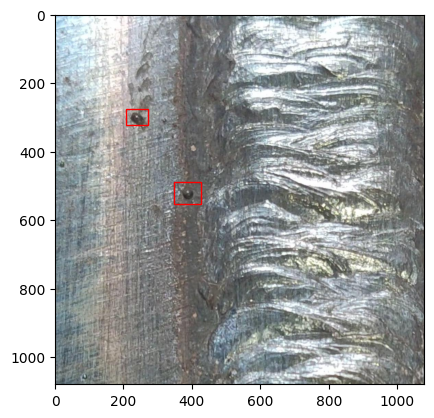

In [ ]:
a = show_img("1_4 (91).jpg", 1)

In [ ]:
# !pip install ultralytics

In [ ]:
import torch
from ultralytics import YOLO

In [ ]:
# %tensorboard --logdir runs

In [ ]:
# Load a pretrained YOLO model (recommended for training)
model = YOLO("yolov8n.pt")

results = model.train(
    # resume=True,
    data="/content/atomic2/welds.yaml",
    epochs=40,
    batch=28,
    workers=6,
    mosaic=False,
    crop_fraction=0.8,
    flipud=0.5,
    degrees=7,
    # single_cls=True,
    close_mosaic=0,
    plots=True,
    scale=0.05,
    translate=0.025,
    # lr=0.001,
    imgsz=2048
)

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/atomic2/welds.yaml, epochs=40, time=None, patience=100, batch=28, imgsz=2048, save=True, save_period=-1, cache=False, device=None, workers=6, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

train: Scanning /content/train/labels.cache... 1162 images, 140 backgrounds, 0 corrupt: 100%|██████████| 1162/1162 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/train/labels.cache... 1162 images, 140 backgrounds, 0 corrupt: 100%|██████████| 1162/1162 [00:00<?, ?it/s]


Plotting labels to runs/detect/train16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0004375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 2048 train, 2048 val
Using 6 dataloader workers
Logging results to runs/detect/train16
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      40.8G      2.417      10.62      2.283         38       2048: 100%|██████████| 42/42 [00:58<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:36<00:00,  1.72s/it]


                   all       1162       3425    0.00422       0.25     0.0244    0.00765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      40.2G      2.099      7.504      1.918         54       2048: 100%|██████████| 42/42 [00:45<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:37<00:00,  1.81s/it]


                   all       1162       3425      0.484      0.223     0.0613     0.0213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      40.4G      2.066      6.114       1.88         34       2048: 100%|██████████| 42/42 [00:42<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:35<00:00,  1.70s/it]


                   all       1162       3425      0.557       0.24      0.125     0.0388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      40.1G      2.033      4.962      1.842         26       2048: 100%|██████████| 42/42 [00:44<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:33<00:00,  1.62s/it]


                   all       1162       3425      0.617      0.142      0.157     0.0474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      40.3G       2.02      3.849      1.823         40       2048: 100%|██████████| 42/42 [00:47<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:28<00:00,  1.34s/it]


                   all       1162       3425       0.52       0.21      0.201     0.0662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      40.5G      1.984      3.193      1.815         40       2048: 100%|██████████| 42/42 [00:48<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:29<00:00,  1.41s/it]


                   all       1162       3425      0.473      0.262      0.275     0.0989

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      40.4G      1.934      2.681      1.763         41       2048: 100%|██████████| 42/42 [00:45<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.66it/s]


                   all       1162       3425      0.455      0.401      0.382       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      40.3G      1.908      2.362      1.741         74       2048: 100%|██████████| 42/42 [01:01<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.35it/s]


                   all       1162       3425      0.448      0.444      0.428      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      38.5G      1.881      2.147      1.735         35       2048: 100%|██████████| 42/42 [00:55<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.67it/s]


                   all       1162       3425      0.611      0.492      0.543      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      40.6G       1.85      1.901      1.699         38       2048: 100%|██████████| 42/42 [01:02<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.66it/s]


                   all       1162       3425      0.659      0.521      0.573       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      40.3G      1.816       1.76      1.669         34       2048: 100%|██████████| 42/42 [00:59<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.56it/s]


                   all       1162       3425      0.582      0.567      0.573      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      40.4G      1.801      1.634      1.665         50       2048: 100%|██████████| 42/42 [00:57<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]


                   all       1162       3425      0.728      0.614      0.691      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      40.5G      1.756      1.568       1.63         34       2048: 100%|██████████| 42/42 [01:00<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.75it/s]


                   all       1162       3425      0.687      0.614      0.681      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      40.3G       1.74      1.458      1.595         43       2048: 100%|██████████| 42/42 [01:01<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]


                   all       1162       3425      0.747      0.613      0.692      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      40.6G      1.729      1.413      1.602         33       2048: 100%|██████████| 42/42 [00:58<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.74it/s]


                   all       1162       3425      0.792      0.684      0.765      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      40.7G      1.696       1.32      1.565         24       2048: 100%|██████████| 42/42 [01:00<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]


                   all       1162       3425       0.78      0.715       0.78      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      40.4G      1.673      1.258      1.554         48       2048: 100%|██████████| 42/42 [01:01<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.73it/s]

                   all       1162       3425      0.749      0.681       0.75      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      40.3G      1.672      1.217      1.548         51       2048: 100%|██████████| 42/42 [01:00<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.79it/s]

                   all       1162       3425      0.779      0.717      0.791      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      40.4G      1.648      1.176      1.531         54       2048: 100%|██████████| 42/42 [01:01<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.71it/s]

                   all       1162       3425      0.816      0.734      0.828      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      40.4G      1.644      1.136      1.513         42       2048: 100%|██████████| 42/42 [00:59<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.74it/s]

                   all       1162       3425      0.827      0.747      0.827       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      40.1G       1.62      1.107      1.514         47       2048: 100%|██████████| 42/42 [01:01<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.74it/s]

                   all       1162       3425      0.788       0.75      0.823      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      40.1G      1.613      1.061        1.5         34       2048: 100%|██████████| 42/42 [00:59<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.68it/s]

                   all       1162       3425      0.838      0.775      0.852      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      40.2G      1.589       1.05      1.488         25       2048: 100%|██████████| 42/42 [00:59<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.67it/s]

                   all       1162       3425      0.842      0.816      0.873      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      40.4G      1.567      1.011      1.475         50       2048: 100%|██████████| 42/42 [01:02<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.83it/s]

                   all       1162       3425      0.877      0.784      0.869      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      40.5G      1.555     0.9904      1.465         55       2048: 100%|██████████| 42/42 [01:02<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.74it/s]

                   all       1162       3425      0.861      0.796      0.873      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      40.4G      1.467     0.9587      1.442        104       2048:  12%|█▏        | 5/42 [00:03<00:29,  1.25it/s]


KeyboardInterrupt: 

In [ ]:
model = YOLO("/content/runs/detect/train16/weights/best.pt")

In [ ]:
results = model.val(
    data="/content/atomic2/welds.yaml",
    plots=True,
    iou = 0.5,
    conf=0.0001
)

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/train/labels.cache... 1162 images, 140 backgrounds, 0 corrupt: 100%|██████████| 1162/1162 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/73 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:32<00:00,  2.24it/s]


                   all       1162       3425      0.849      0.834      0.878      0.421
                   adj        392       1482      0.858      0.894      0.912      0.403
                   int        317        388      0.838       0.67      0.759      0.333
                   geo        805       1063      0.855        0.9       0.94      0.503
                   pro        180        287      0.907      0.927      0.943       0.48
                   non        165        205       0.79       0.78      0.836      0.386
Speed: 0.7ms preprocess, 3.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val5


# **Evaluation**

In [ ]:
# !cp -r /content/drive/MyDrive/atomic2 .
# !unzip ./atomic2/dataset.zip -d atomic2/data

In [ ]:
# !cp -r /content/drive/MyDrive/atomic2/Test_data .
# !cp -r /content/drive/MyDrive/atomic2/yolo8n-20ep_v1.pt .
# !cp -r /content/drive/MyDrive/atomic2/yolo8m-40ep_v1.pt .
# !cp -r /content/drive/MyDrive/atomic2/yolo8m-40ep_v2.pt .
# !cp -r /content/drive/MyDrive/atomic2/best_seva.pt .

In [ ]:
# !pip install ultralytics

In [ ]:
import pandas as pd
import torch
from ultralytics import YOLO

In [ ]:
# model = YOLO("yolo8n-20ep_v1.pt")
# model = YOLO("yolo8m-40ep_v1.pt")
# model = YOLO("yolo8m-40ep_v2.pt")
model = YOLO("best_seva.pt")

In [ ]:
source = "/content/Test_data/test_dataset"
# source = "/content/atomic2/data"

In [ ]:
results = model(source, stream=True)  # generator of Results objects
counter = 0

df = pd.DataFrame({
    "filename": [],
    "class_id": [],
    "rel_x": [],
    "rel_y": [],
    "width": [],
    "height": [],
    "conf": [],
})

for item in results:
    boxes = item.boxes

    img_name = item.path.split("/")[-1]
    class_ids = boxes.cls.cpu().numpy()
    xywhn = boxes.xywhn.cpu().numpy()
    conf = boxes.conf.cpu().numpy()

    for cls, arr, con in zip(class_ids, xywhn, conf):
        row = [
            img_name,
            int(cls),
            arr[0],
            arr[1],
            arr[2],
            arr[3],
            con
        ]
        df.loc[len(df)] = row
    counter += 1

df.to_csv("sumbission.csv", index=False, sep=";")
df


image 1/363 /content/Test_data/test_dataset/0.jpg: 640x1088 (no detections), 152.6ms
image 2/363 /content/Test_data/test_dataset/1 (1).jpg: 640x1088 (no detections), 107.1ms
image 3/363 /content/Test_data/test_dataset/1 (101).jpg: 640x1088 (no detections), 95.6ms
image 4/363 /content/Test_data/test_dataset/1 (102).jpg: 640x1088 (no detections), 91.0ms
image 5/363 /content/Test_data/test_dataset/1 (103).jpg: 640x1088 (no detections), 97.4ms
image 6/363 /content/Test_data/test_dataset/1 (104).jpg: 640x1088 (no detections), 90.5ms
image 7/363 /content/Test_data/test_dataset/1 (107).jpg: 640x1088 (no detections), 92.9ms
image 8/363 /content/Test_data/test_dataset/1 (108).jpg: 640x1088 1 adj, 96.5ms
image 9/363 /content/Test_data/test_dataset/1 (109).jpg: 640x1088 1 pro, 93.4ms
image 10/363 /content/Test_data/test_dataset/1 (110).jpg: 640x1088 (no detections), 92.8ms
image 11/363 /content/Test_data/test_dataset/1 (13).jpg: 640x1088 1 adj, 2 pros, 94.5ms
image 12/363 /content/Test_data/test

,filename,class_id,rel_x,rel_y,width,height,conf
0,1 (108).jpg,0,0.511040,0.411334,0.043171,0.219464,0.252025
1,1 (109).jpg,3,0.633987,0.702757,0.036722,0.035853,0.281938
2,1 (13).jpg,3,0.253417,0.733733,0.036084,0.038824,0.391499
3,1 (13).jpg,0,0.486456,0.636956,0.020393,0.052784,0.265924
4,1 (13).jpg,3,0.253640,0.734054,0.028576,0.034094,0.262498
...,...,...,...,...,...,...,...
176,84.jpg,0,0.331532,0.843933,0.051002,0.126547,0.348811
177,86.jpg,0,0.651843,0.871287,0.057351,0.118672,0.391742
178,87.jpg,0,0.655879,0.773433,0.055820,0.114893,0.536565
179,91.jpg,0,0.313854,0.893567,0.059934,0.181125,0.341539
